In [1]:
# Step 1: Import Libraries
import os
import cv2

In [2]:
# Step 2: Define the Function
def resize_and_convert_to_grayscale(image_folder, mask_folder, output_image_folder, output_mask_folder, size=(256, 256)):
    # Create output directories if they don't exist
    if not os.path.exists(output_image_folder):
        os.makedirs(output_image_folder)
    
    if not os.path.exists(output_mask_folder):
        os.makedirs(output_mask_folder)
    
    # List image and mask files
    image_files = os.listdir(image_folder)
    mask_files = os.listdir(mask_folder)
    
    for image_file, mask_file in zip(image_files, mask_files):
        # Read the image and mask
        image_path = os.path.join(image_folder, image_file)
        mask_path = os.path.join(mask_folder, mask_file)
        
        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path)
        
        # Resize the image
        resized_image = cv2.resize(image, size, interpolation=cv2.INTER_LINEAR)
        
        # Resize the mask using nearest neighbor interpolation
        # cv2.INTER_NEAREST interpolation for resizing masks, his method preserves the original pixel values without introducing new ones.
        resized_mask = cv2.resize(mask, size, interpolation=cv2.INTER_NEAREST)
        
        # Convert the mask to grayscale
        gray_mask = cv2.cvtColor(resized_mask, cv2.COLOR_BGR2GRAY)
        
        # Save the resized image and mask
        output_image_path = os.path.join(output_image_folder, image_file)
        output_mask_path = os.path.join(output_mask_folder, mask_file)
        
        cv2.imwrite(output_image_path, resized_image)
        cv2.imwrite(output_mask_path, gray_mask)


In [3]:
# Step 3: Define Paths
image_folder = 'data_road/renamed_data/images'
mask_folder = 'data_road/renamed_data/masks'
output_image_folder = 'data_road/processed_data/images'
output_mask_folder = 'data_road/processed_data/masks'


In [4]:
# Process the images and masks
resize_and_convert_to_grayscale(image_folder, mask_folder, output_image_folder, output_mask_folder)


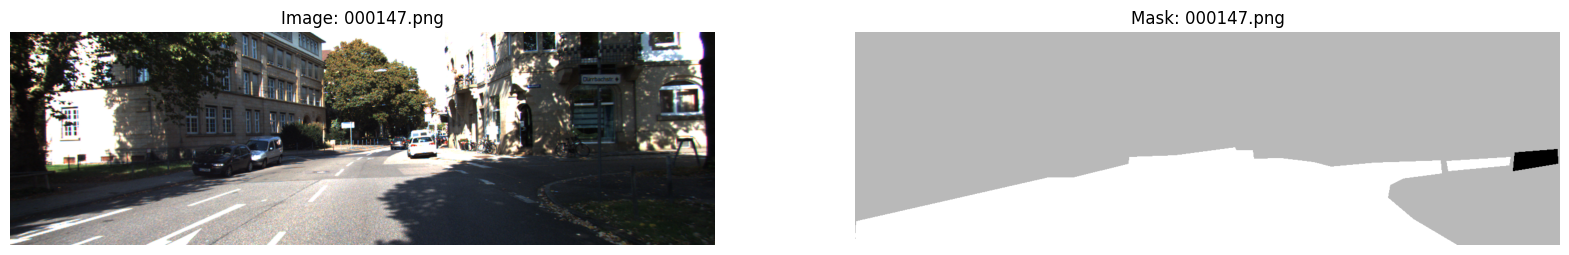

In [5]:
import random
import matplotlib.pyplot as plt

# Get list of files
image_files = os.listdir(image_folder)
mask_files = os.listdir(mask_folder)

# Randomly select N number (how_many_pairs) of pairs of files
how_many_pairs = 1
selected_files = random.sample(list(zip(image_files, mask_files)), how_many_pairs)

def display_images_and_masks(selected_files, image_folder, mask_folder):
    plt.figure(figsize=(20, 10))
    
    for i, (image_file, mask_file) in enumerate(selected_files):
        # Read the image and mask
        image_path = os.path.join(image_folder, image_file)
        mask_path = os.path.join(mask_folder, mask_file)
        
        image = cv2.imread(image_path)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        # Convert BGR to RGB for display
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Display image
        plt.subplot(how_many_pairs, 2, 2*i + 1)
        plt.imshow(image_rgb)
        plt.title(f'Image: {image_file}')
        plt.axis('off')
        
        # Display mask
        plt.subplot(how_many_pairs, 2, 2*i + 2)
        plt.imshow(mask, cmap='gray')
        plt.title(f'Mask: {mask_file}')
        plt.axis('off')
    
    plt.show()

# Display images and masks
display_images_and_masks(selected_files, image_folder, mask_folder)



In [6]:
import numpy as np

def count_unique_pixels_in_masks(selected_files, mask_folder):
    pixel_counts = {}
    
    for _, mask_file in selected_files:
        # Read the mask
        mask_path = os.path.join(mask_folder, mask_file)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        # Count unique pixel values
        unique, counts = np.unique(mask, return_counts=True)
        pixel_count_dict = dict(zip(unique, counts))
        
        # Merge counts into global dictionary
        for pixel_value, count in pixel_count_dict.items():
            if pixel_value in pixel_counts:
                pixel_counts[pixel_value] += count
            else:
                pixel_counts[pixel_value] = count
    
    # Sort pixel values by count in descending order
    sorted_pixel_counts = sorted(pixel_counts.items(), key=lambda item: item[1], reverse=True)
    
    # Display top 10 pixel values
    print("Top 10 Unique Pixel Values in Masks (Value: Count):")
    for value, count in sorted_pixel_counts[:10]:
        print(f"{value}: {count}")

# Count and display unique pixel values
count_unique_pixels_in_masks(selected_files, mask_folder)


Top 10 Unique Pixel Values in Masks (Value: Count):
76: 338596
105: 124862
0: 2292


In [7]:
# mask transformation

# mask_transformed[mask > 76] = 255
# mask_transformed[mask == 76] = 127
# mask_transformed[mask < 76] = 0

In [8]:
mask_folder = 'data_road/processed_data/masks'
output_folder = 'data_road/processed_data/greyscale_scaled_255_masks'

# Create the output directory if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Get list of mask files
mask_files = os.listdir(mask_folder)

def transform_and_save_masks(mask_files, mask_folder, output_folder):
    for mask_file in mask_files:
        mask_path = os.path.join(mask_folder, mask_file)
        output_path = os.path.join(output_folder, mask_file)

        # Read the mask image in grayscale
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Apply the transformation
        mask_transformed = np.zeros_like(mask)
        mask_transformed[mask > 76] = 255
        mask_transformed[mask == 76] = 127
        mask_transformed[mask < 76] = 0

        # Save the transformed mask
        cv2.imwrite(output_path, mask_transformed)

# Run the transformation and save process
transform_and_save_masks(mask_files, mask_folder, output_folder)

print("Transformation and saving completed.")

Transformation and saving completed.


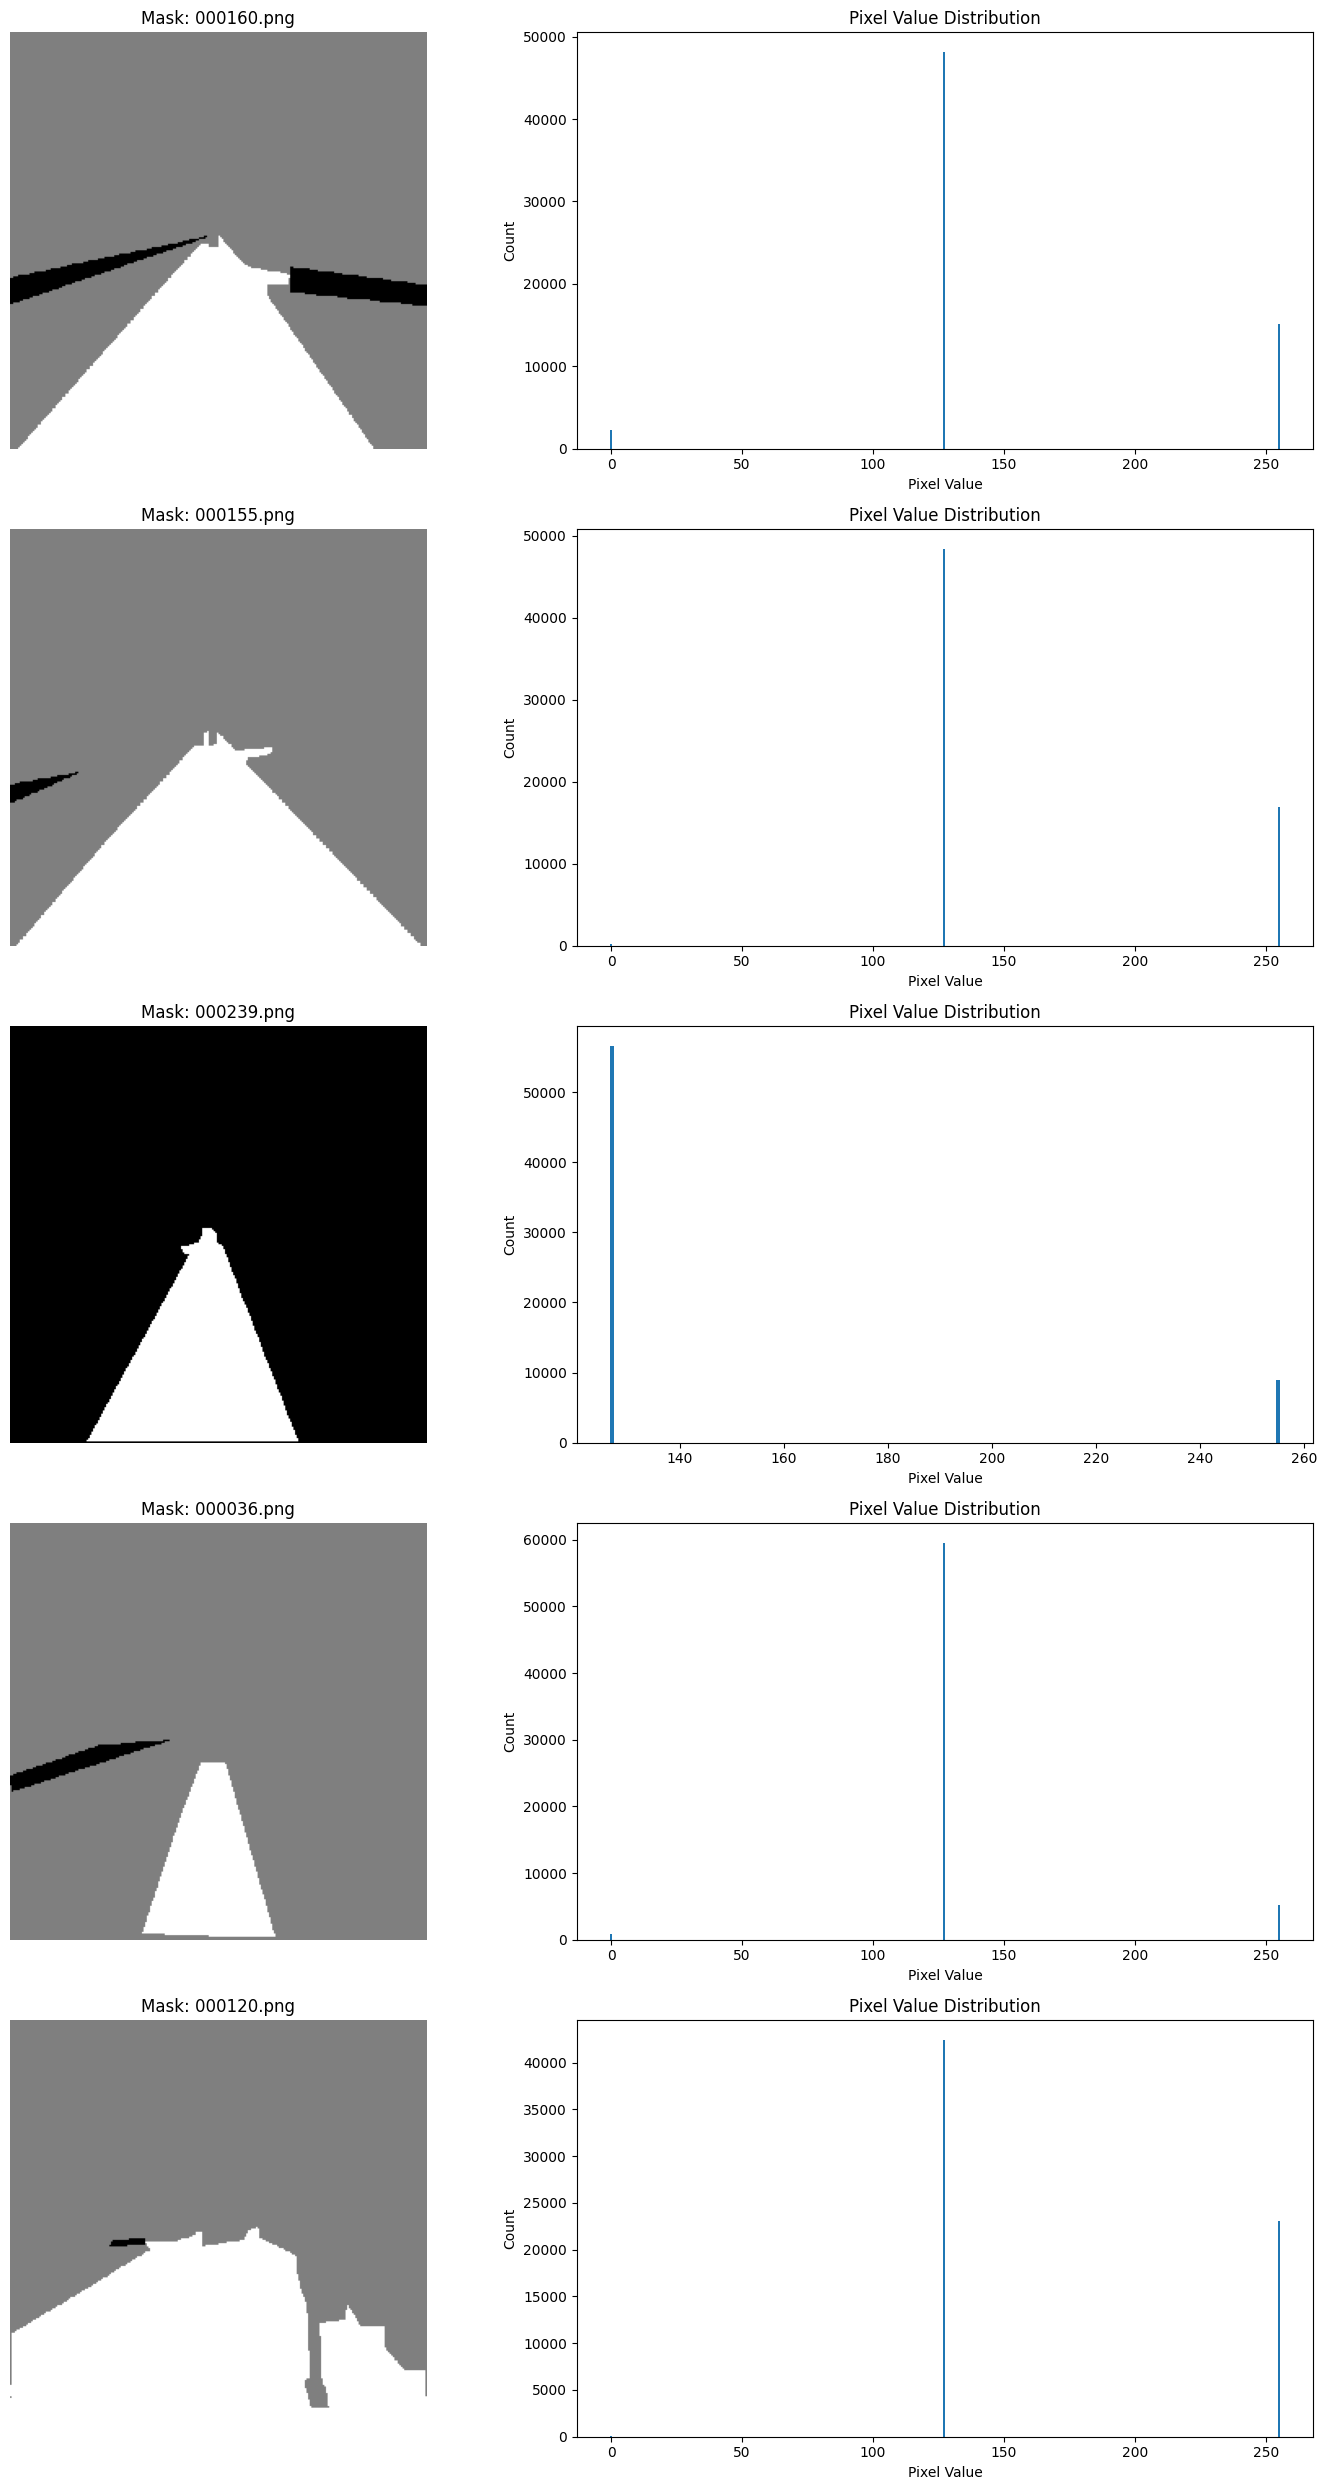

Overall Unique Pixel Values in Selected Masks (Value: Count):
127: 254911
255: 69333
0: 3436


In [9]:
# Set the mask folder to the new directory of scaled masks
mask_folder = 'data_road/processed_data/greyscale_scaled_255_masks'

# Get list of mask files from the new folder
mask_files = os.listdir(mask_folder)

# Define how many masks you want to randomly select
N = 5  # Change this to whatever number you want

# Randomly select N mask files
if len(mask_files) > N:
    selected_files = random.sample(mask_files, N)
else:
    selected_files = mask_files

def display_and_count_masks(selected_files, mask_folder):
    plt.figure(figsize=(15, 5 * len(selected_files)))
    pixel_counts = {}

    for i, mask_file in enumerate(selected_files):
        # Read the mask
        mask_path = os.path.join(mask_folder, mask_file)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        # Display the mask
        plt.subplot(len(selected_files), 2, 2 * i + 1)
        plt.imshow(mask, cmap='gray')
        plt.title(f'Mask: {mask_file}')
        plt.axis('off')
        
        # Count unique pixel values
        unique, counts = np.unique(mask, return_counts=True)
        pixel_count_dict = dict(zip(unique, counts))
        
        # Display pixel counts
        plt.subplot(len(selected_files), 2, 2 * i + 2)
        plt.bar(unique, counts)
        plt.title('Pixel Value Distribution')
        plt.xlabel('Pixel Value')
        plt.ylabel('Count')
        
        # Merge counts into global dictionary
        for pixel_value, count in pixel_count_dict.items():
            if pixel_value in pixel_counts:
                pixel_counts[pixel_value] += count
            else:
                pixel_counts[pixel_value] = count
    
    # Display global pixel value counts after all masks
    plt.tight_layout()
    plt.show()

    print("Overall Unique Pixel Values in Selected Masks (Value: Count):")
    for value, count in sorted(pixel_counts.items(), key=lambda item: item[1], reverse=True):
        print(f"{value}: {count}")

# Display images and masks, count pixels
display_and_count_masks(selected_files, mask_folder)